#Importing required libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
file_path = r'D:\BANASHREE\KAGGLE DATASETS\diabetes_binary_health_indicators_BRFSS2015.csv'

df = pd.read_csv(file_path)

In [17]:
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier

from sklearn.model_selection import cross_val_score,KFold
from sklearn.metrics import accuracy_score,confusion_matrix,f1_score,roc_curve,roc_auc_score,recall_score
from sklearn.metrics import precision_score,recall_score
from imblearn.under_sampling import NearMiss,RandomUnderSampler
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import chi2

#Loading the dataset

#Exploratory Data Analysis

In [4]:
df.shape

(253680, 22)

The dataset have 22 features and 253680 data points

In [5]:
df.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [7]:
##what are the columns?
df.columns

Index(['Diabetes_binary', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_binary       253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [9]:
df.describe().T #provides the minimum value,maximum value,mean,standard deviation etc for each features. This gives an statistical overview of the features

,count,mean,std,min,25%,50%,75%,max
Diabetes_binary,253680.0,0.139333,0.346294,0.0,0.0,0.0,0.0,1.0
HighBP,253680.0,0.429001,0.494934,0.0,0.0,0.0,1.0,1.0
HighChol,253680.0,0.424121,0.494210,0.0,0.0,0.0,1.0,1.0
CholCheck,253680.0,0.962670,0.189571,0.0,1.0,1.0,1.0,1.0
BMI,253680.0,28.382364,6.608694,12.0,24.0,27.0,31.0,98.0
Smoker,253680.0,0.443169,0.496761,0.0,0.0,0.0,1.0,1.0
Stroke,253680.0,0.040571,0.197294,0.0,0.0,0.0,0.0,1.0
HeartDiseaseorAttack,253680.0,0.094186,0.292087,0.0,0.0,0.0,0.0,1.0
PhysActivity,253680.0,0.756544,0.429169,0.0,1.0,1.0,1.0,1.0
Fruits,253680.0,0.634256,0.481639,0.0,0.0,1.0,1.0,1.0


In [10]:
#what values does each feature take?
unique_values={}
for col in df.columns:
      unique_values[col]=df[col].value_counts().shape[0]
unique_values

{'Diabetes_binary': 2,
 'HighBP': 2,
 'HighChol': 2,
 'CholCheck': 2,
 'BMI': 84,
 'Smoker': 2,
 'Stroke': 2,
 'HeartDiseaseorAttack': 2,
 'PhysActivity': 2,
 'Fruits': 2,
 'Veggies': 2,
 'HvyAlcoholConsump': 2,
 'AnyHealthcare': 2,
 'NoDocbcCost': 2,
 'GenHlth': 5,
 'MentHlth': 31,
 'PhysHlth': 31,
 'DiffWalk': 2,
 'Sex': 2,
 'Age': 13,
 'Education': 6,
 'Income': 8}

In [11]:
## Is there any Null values?
df.isnull().sum()

Diabetes_binary         0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

Thus, this data set has no null values

In [14]:
##There might be duplicate rows, duplicated rows means the data points which are redundant. thus checking if there are any duplicate rows
duplicate_rows=df.duplicated()  #by default it checks for al columns
duplicate_rows.sum()  #number of duplicate rows


24206

In [6]:
df.drop_duplicates(inplace=True)  #remove the duplicate rows

In [7]:
df.shape  #sahpe of the dataset after removal of the duplicate rows

(229474, 22)

#univariate data analysis


<Axes: xlabel='Diabetes_binary'>

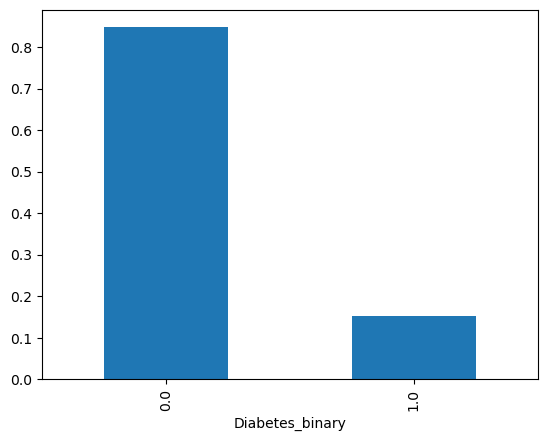

In [15]:
df['Diabetes_binary'].value_counts(normalize=True).plot(kind='bar')


Less than 20% patients are diabetic,imbalanced dataset

<Axes: xlabel='HighBP'>

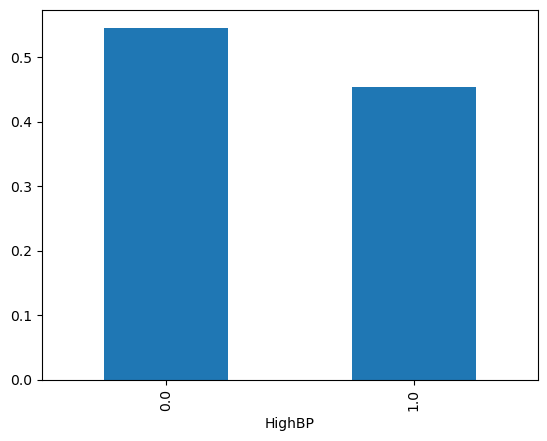

In [16]:
df['HighBP'].value_counts(normalize=True).plot(kind='bar')

almost 45% of the data people have high BP

(array([3.21010e+04, 1.56217e+05, 3.55180e+04, 4.28100e+03, 7.07000e+02,
        2.47000e+02, 3.19000e+02, 8.40000e+01]),
 array([12.  , 22.75, 33.5 , 44.25, 55.  , 65.75, 76.5 , 87.25, 98.  ]),
 <BarContainer object of 8 artists>)

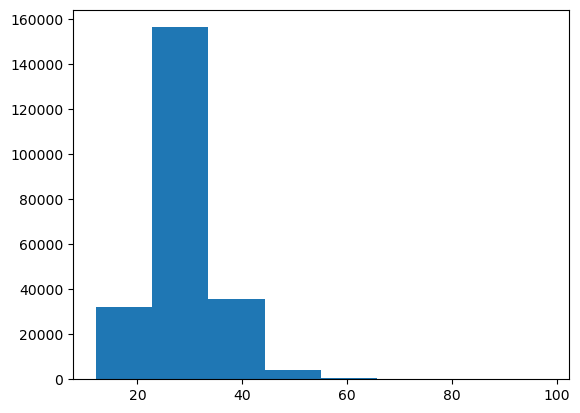

In [17]:
plt.hist(df['BMI'], bins=8)

array([[<Axes: title={'center': 'Diabetes_binary'}>,
        <Axes: title={'center': 'HighBP'}>,
        <Axes: title={'center': 'HighChol'}>,
        <Axes: title={'center': 'CholCheck'}>,
        <Axes: title={'center': 'BMI'}>],
       [<Axes: title={'center': 'Smoker'}>,
        <Axes: title={'center': 'Stroke'}>,
        <Axes: title={'center': 'HeartDiseaseorAttack'}>,
        <Axes: title={'center': 'PhysActivity'}>,
        <Axes: title={'center': 'Fruits'}>],
       [<Axes: title={'center': 'Veggies'}>,
        <Axes: title={'center': 'HvyAlcoholConsump'}>,
        <Axes: title={'center': 'AnyHealthcare'}>,
        <Axes: title={'center': 'NoDocbcCost'}>,
        <Axes: title={'center': 'GenHlth'}>],
       [<Axes: title={'center': 'MentHlth'}>,
        <Axes: title={'center': 'PhysHlth'}>,
        <Axes: title={'center': 'DiffWalk'}>,
        <Axes: title={'center': 'Sex'}>, <Axes: title={'center': 'Age'}>],
       [<Axes: title={'center': 'Education'}>,
        <Axes: title=

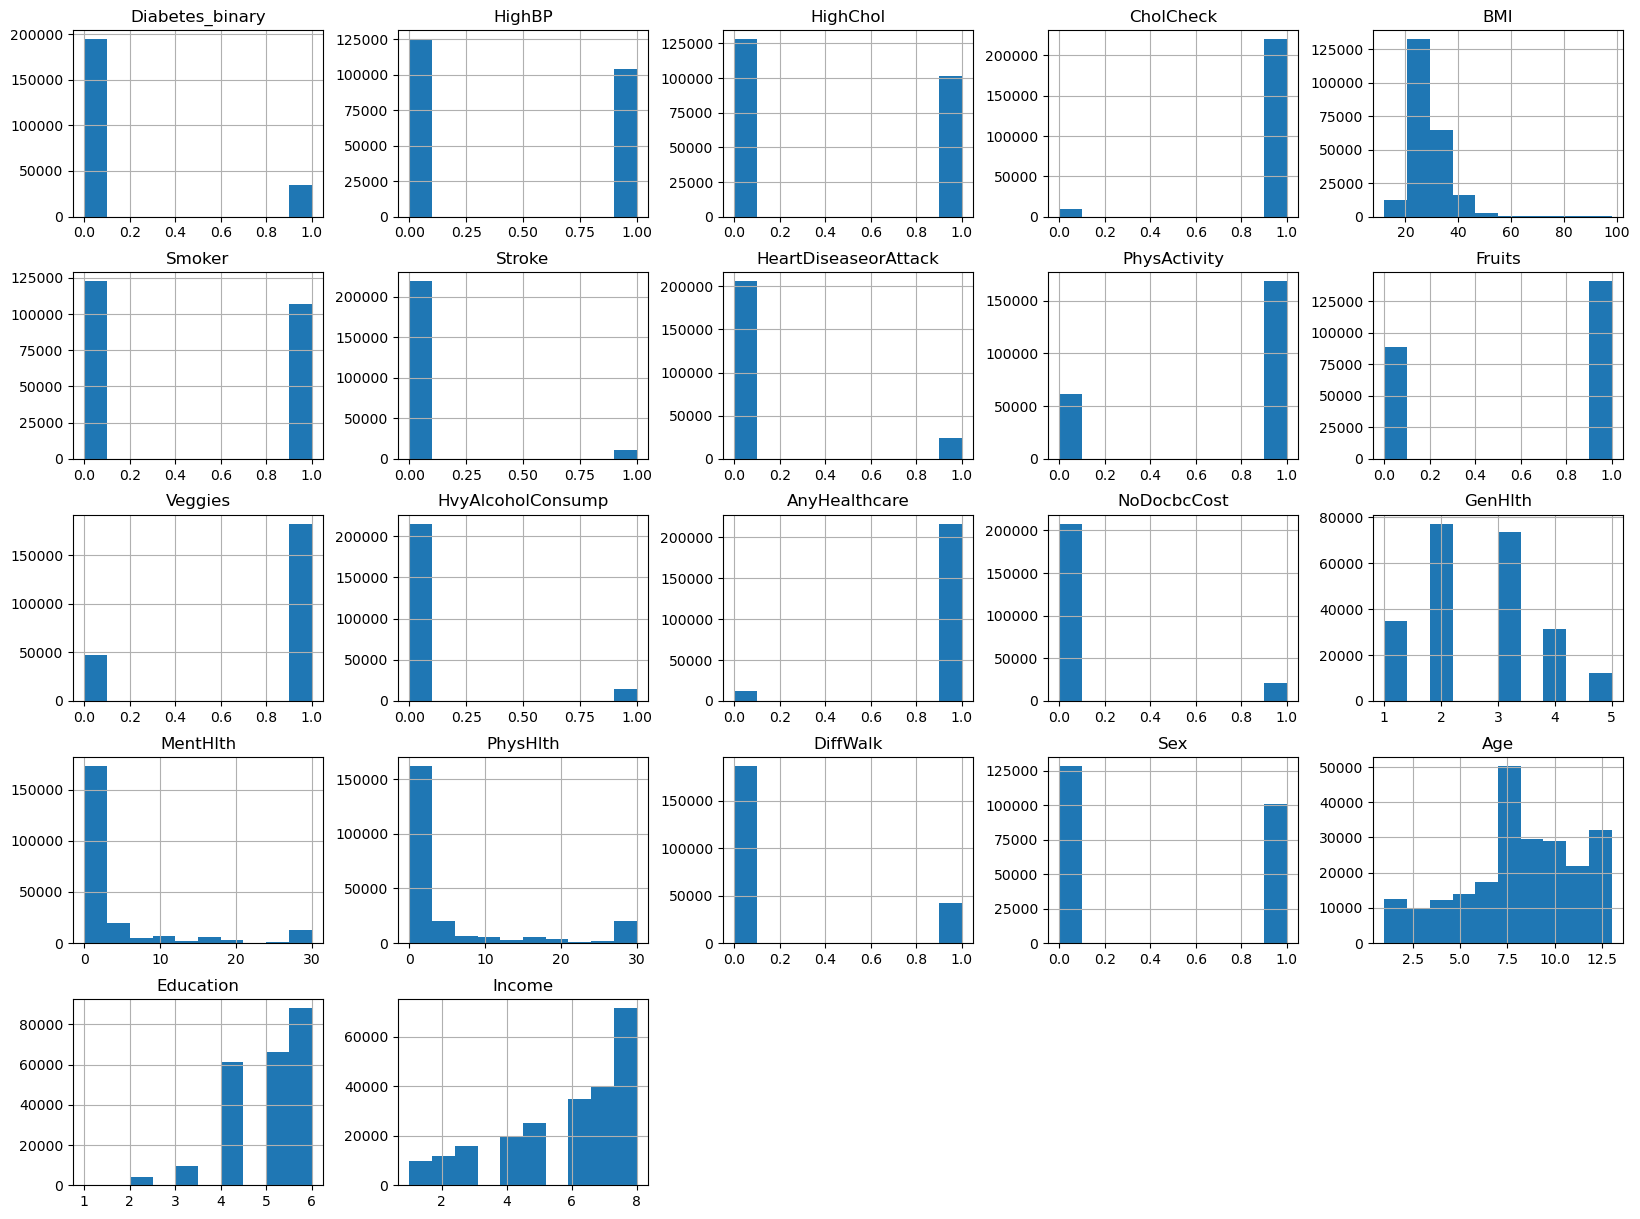

In [18]:
df.hist(figsize=(20,15))  ##plot histogram of all the features

#Bivariate analysis

In [19]:
cat_features=[col for col in df.columns if df[col].nunique() == 2 and col != 'Diabetes_binary'] #binary features

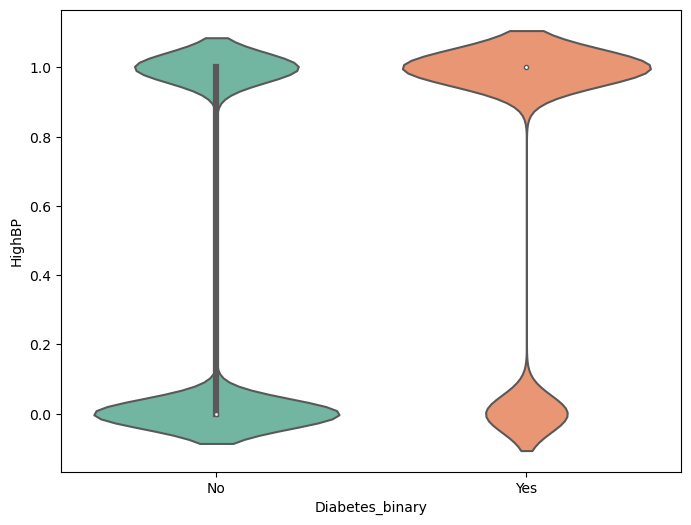

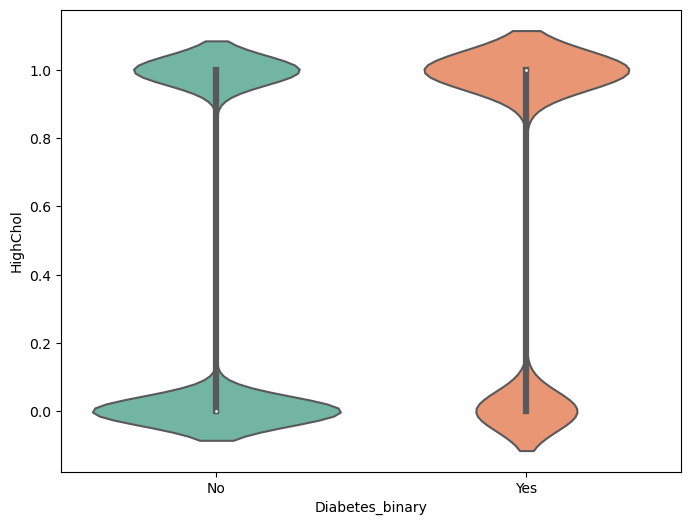

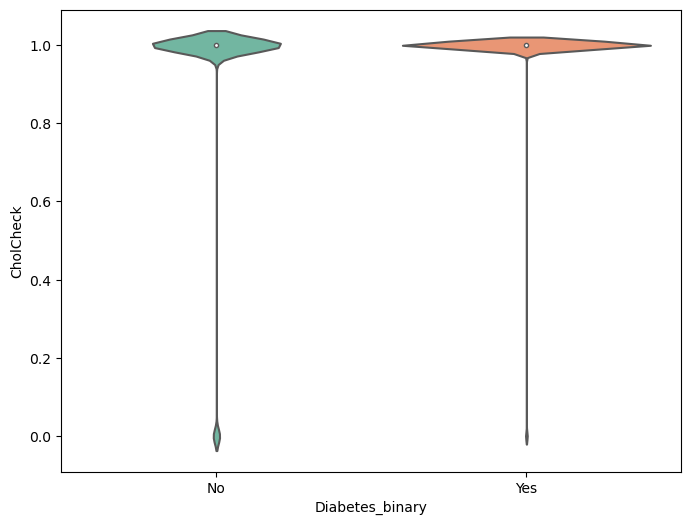

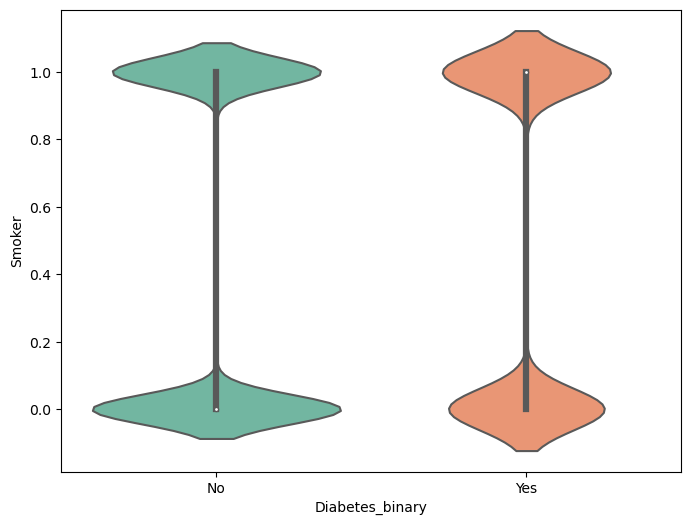

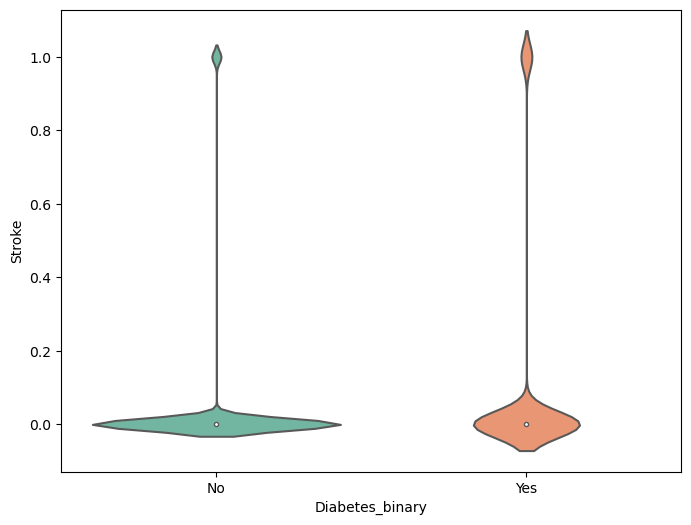

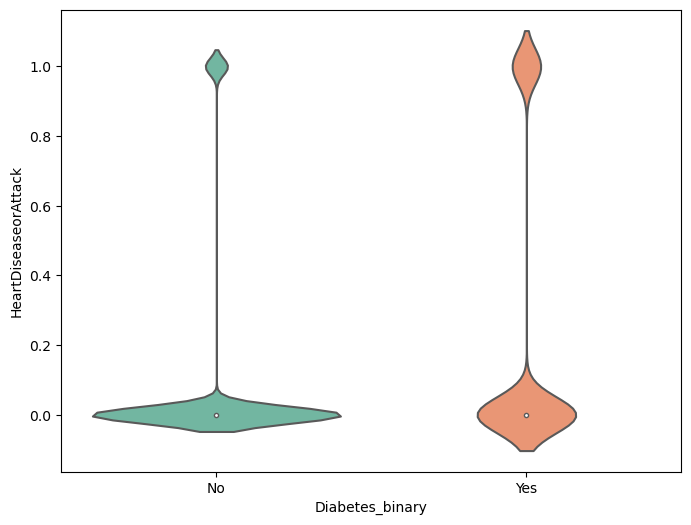

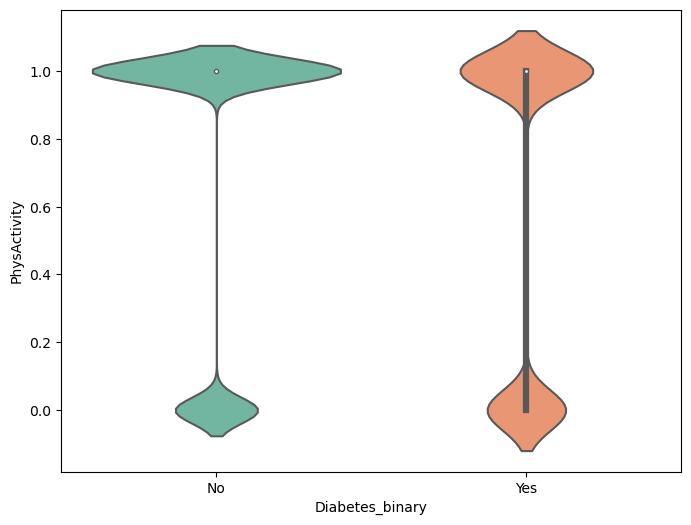

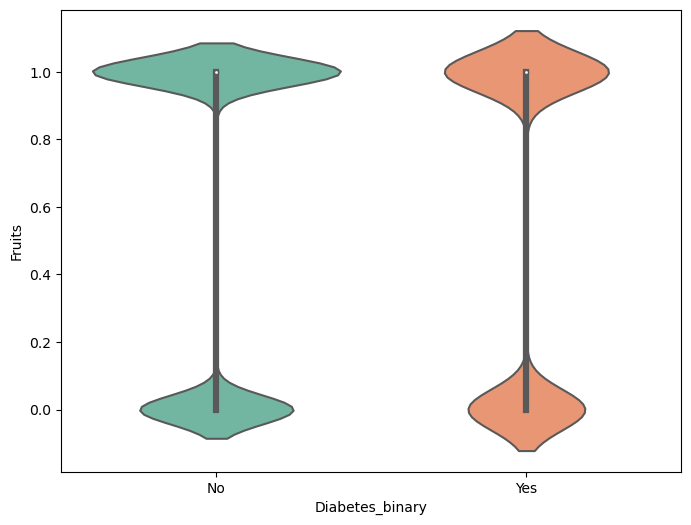

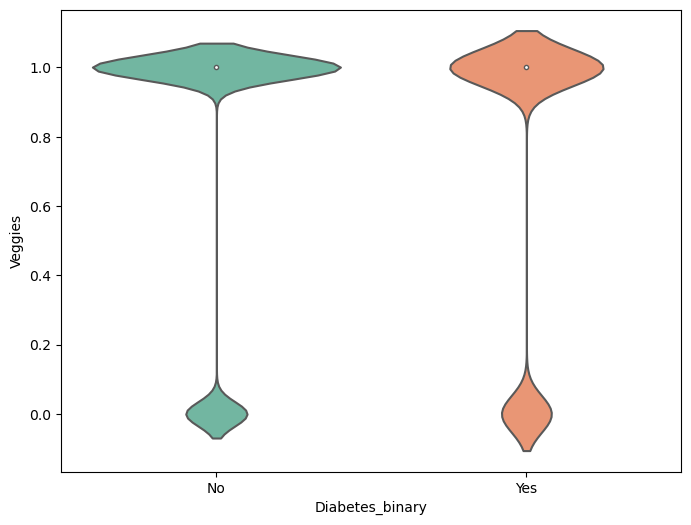

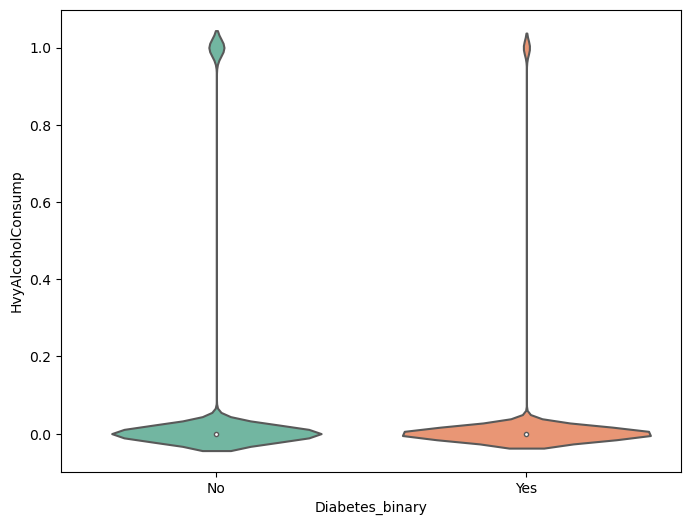

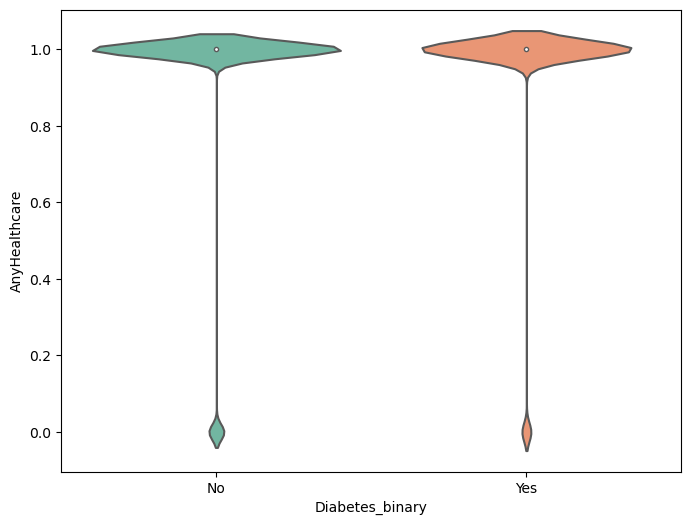

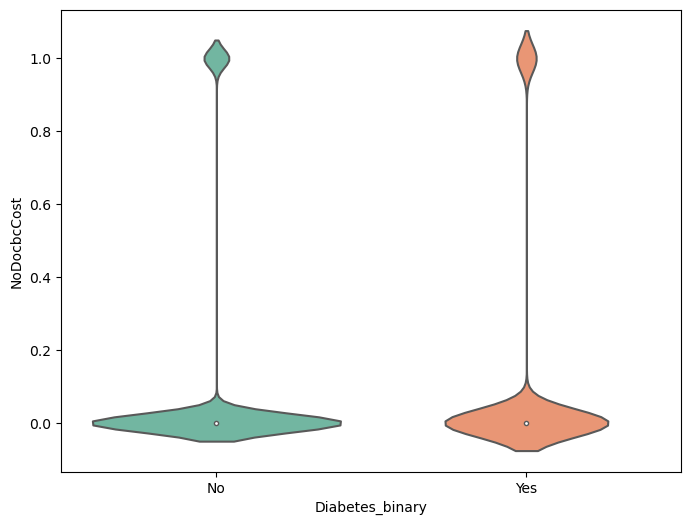

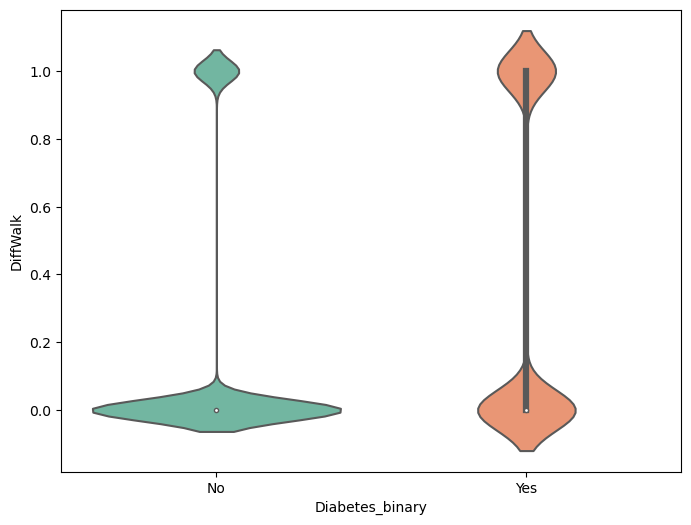

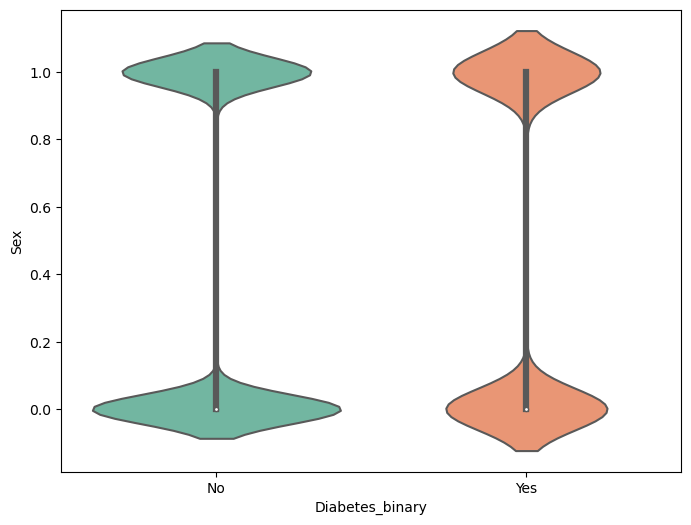

In [20]:
for feature in cat_features:
    plt.figure(figsize=(8, 6))
    sns.violinplot(data=df, x='Diabetes_binary', y=feature, palette='Set2')

    # Customize the plot
    plt.xlabel('Diabetes_binary')
    plt.ylabel(feature)
    # plt.title(f'Distribution of  by {feature} Status')
    plt.xticks(ticks=[0, 1], labels=['No', 'Yes'])

    plt.show()


In [21]:
# plt.figure(figsize=(8, 6))
# sns.violinplot(data=df, x='Diabetes_binary', y='HighBP', palette='Set2')

# # Customize the plot
# plt.xlabel('Diabetes Status')
# plt.ylabel('High Blood Pressure')
# plt.title('Distribution of High Blood Pressure by Diabetes Status')
# plt.xticks(ticks=[0, 1], labels=['Non-Diabetic', 'Diabetic'])

# plt.show()

CHECKING CORRELATION BETWEEN FEATURES

genhlth and phyhlth are highly positively correlated.

*   . Fruits , MentlHlth,AnyHealthcare , NoDocbccost and sex are least correlated with Diabetes_binary.
*   HighBP.,Highchol,BMI etc have significanvt correleation with diabetes binary



In [24]:
# pd.crosstab(df.HighBP,df.Diabetes_binary).plot(kind='bar')

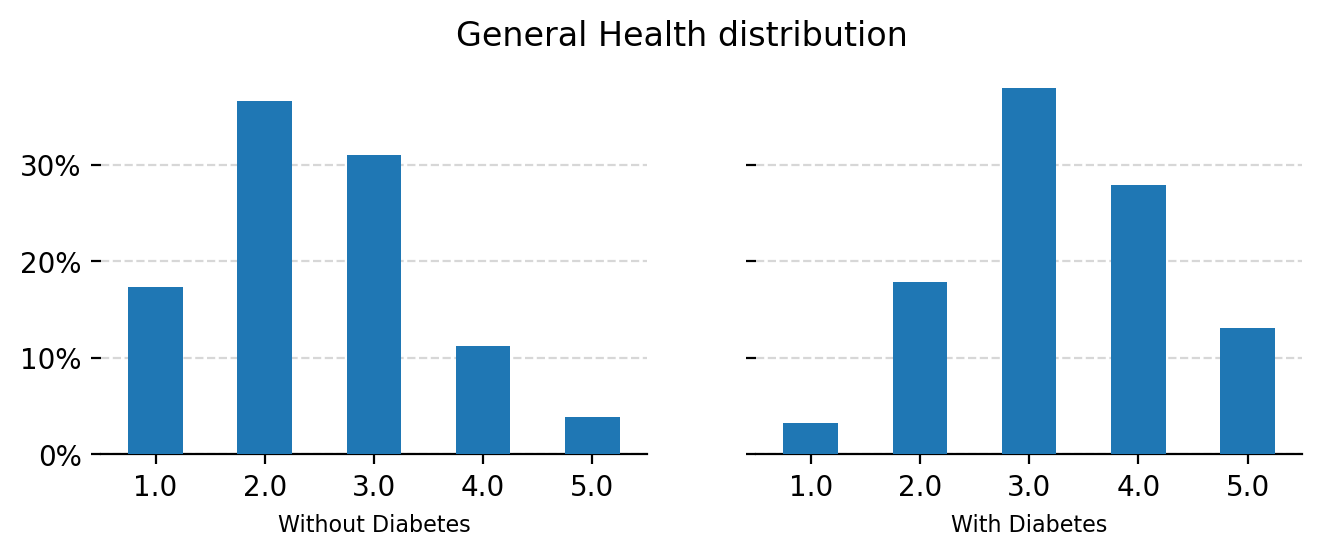

In [25]:
ratio = 2.5
fig, (ax, ax2) = plt.subplots(1,2, figsize=(ratio*3.1,ratio), dpi=200, sharey=True)
fig.suptitle('General Health distribution')

(df[df['Diabetes_binary']==False]['GenHlth']
 .value_counts(1)
 .sort_index()
 .plot(ax=ax,kind='bar', zorder=3)).spines[['top','right', 'left']].set_visible(False)
ax.set_xlabel('Without Diabetes',size=8)
ax.grid(axis='y', linestyle='--', alpha=.5)
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: '{:.0%}'.format(x)))
plt.setp(ax.xaxis.get_majorticklabels(), rotation=0)

(df[df['Diabetes_binary']==True]['GenHlth']
 .value_counts(1)
 .sort_index()
 .plot(ax=ax2, kind='bar', zorder=3)).spines[['top','right', 'left']].set_visible(False)
ax2.set_xlabel('With Diabetes',size=8)
ax2.grid(axis='y', linestyle='--', alpha=.5)
plt.setp(ax2.xaxis.get_majorticklabels(), rotation=0);

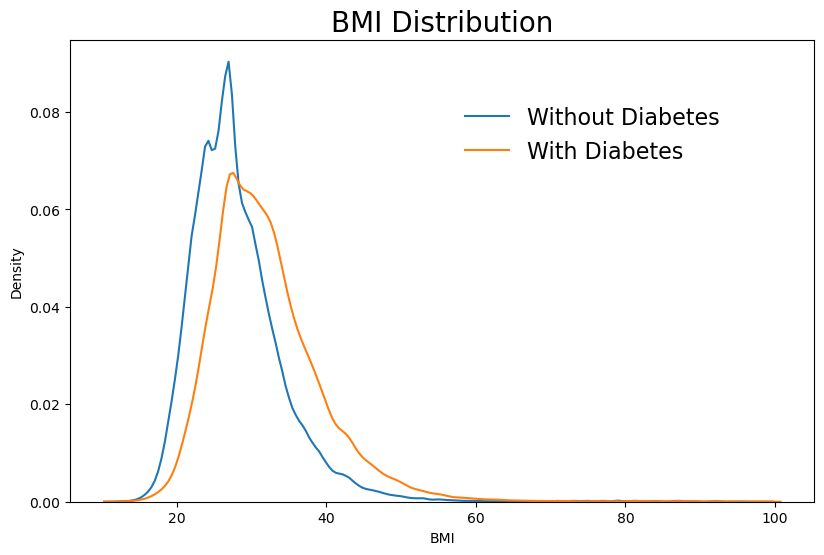

In [27]:
ratio = 6
plt.figure(figsize=(ratio * 1.6, ratio))

# Create violin plots for BMI distribution in each category of 'Diabetes_binary'
sns.kdeplot(data=df[df['Diabetes_binary'] == False], x='BMI', label="Without Diabetes")

# Create KDE plots for BMI distribution in the 'Diabetes_binary' == True group
sns.kdeplot(data=df[df['Diabetes_binary'] == True], x='BMI', label="With Diabetes")

# Set plot title and legend
plt.title("BMI Distribution", size=20)
plt.legend(bbox_to_anchor=(.9, .9, 0, 0), shadow=False, frameon=False, prop={'size': 16})

# Show the plot
plt.show()

In [8]:
#checking Diabetic patient with BMI less than 20

df[(df["BMI"]<=20)]["Diabetes_binary"].value_counts()

Diabetes_binary
0.0    11650
1.0      545
Name: count, dtype: int64

In [9]:
df[(df["BMI"]>20)  & (df["BMI"]<=50)]["Diabetes_binary"].value_counts()

Diabetes_binary
0.0    181255
1.0     33849
Name: count, dtype: int64

In [10]:
df[df["BMI"]>50]["Diabetes_binary"].value_counts()

Diabetes_binary
0.0    1472
1.0     703
Name: count, dtype: int64

C:\Users\sbana\AppData\Local\Temp\ipykernel_25784\168106286.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_bmi_counts = df.groupby(['BMI_Group', 'Diabetes_binary']).size().unstack(fill_value=0)


<Figure size 1000x600 with 0 Axes>

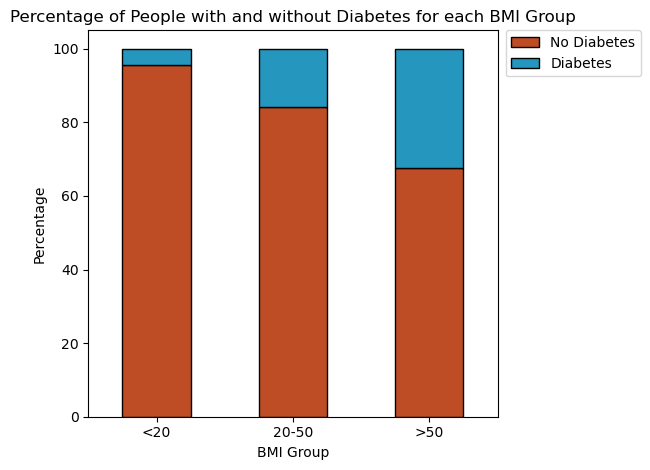

In [11]:


# Categorize BMI into three groups: BMI<20, 20<=BMI<50, BMI>=50
df['BMI_Group'] = pd.cut(df['BMI'], bins=[0, 20, 50, float('inf')], labels=['<20', '20-50', '>50'])

# Create a new DataFrame with the counts of diabetes status for each BMI group
df_bmi_counts = df.groupby(['BMI_Group', 'Diabetes_binary']).size().unstack(fill_value=0)

# Calculate the percentage of diabetic and non-diabetic patients within each BMI group
df_bmi_percentages = df_bmi_counts.div(df_bmi_counts.sum(axis=1), axis=0) * 100

# Plot the stacked bar chart
plt.figure(figsize=(10, 6))
colors = ['#be4d25', '#2596be']
df_bmi_percentages.plot(kind='bar', stacked=True, color=colors, edgecolor='black')

# Set plot title and labels
plt.title("Percentage of People with and without Diabetes for each BMI Group")
plt.xlabel("BMI Group")
plt.ylabel("Percentage")
plt.xticks(rotation=0)

# Show the plot
plt.legend(['No Diabetes', 'Diabetes'], bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0.)
plt.tight_layout()
plt.show()


As BMI increases, the chances of being diabetic increase

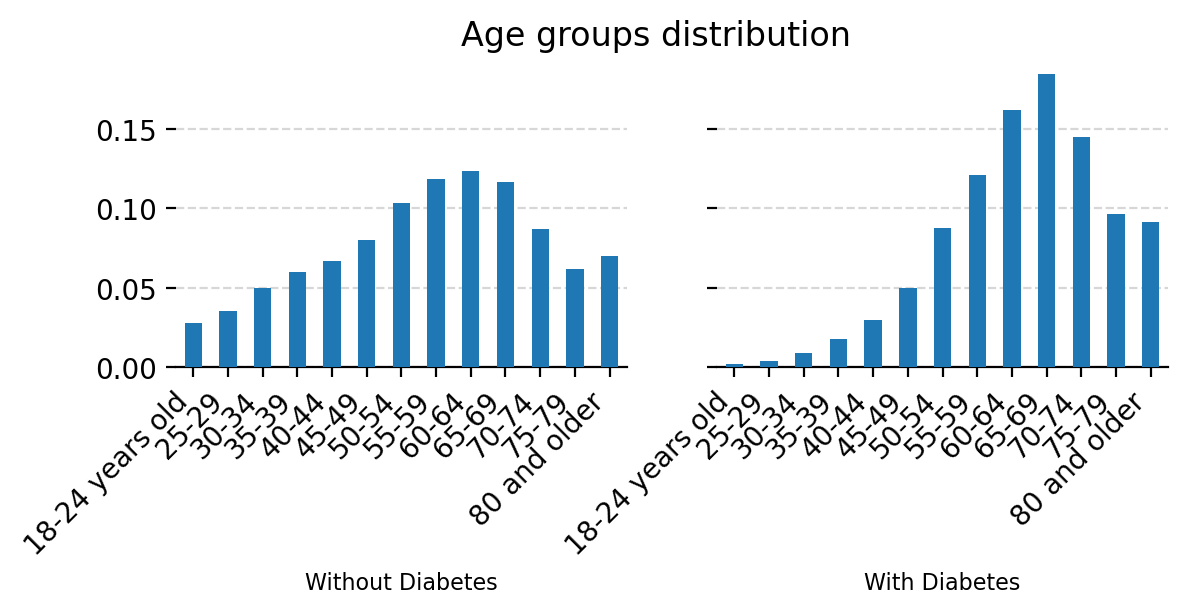

In [12]:
ratio = 2
fig, (ax, ax2) = plt.subplots(1,2, figsize=(ratio*3.2,ratio), dpi=200, sharey=True)
fig.suptitle('Age groups distribution')
age_groups = ['18-24 years old', '25-29', '30-34',
              '35-39', '40-44', '45-49', '50-54',
              '55-59', '60-64', '65-69', '70-74',
              '75-79', '80 and older']


(df[df['Diabetes_binary']==False]['Age']
 .value_counts(1)
 .sort_index()
 .plot(ax=ax,kind='bar', zorder=3)).spines[['top','right', 'left']].set_visible(False)
ax.set_xlabel('Without Diabetes',size=8)
ax.set_xticklabels(age_groups)
# ax.yaxis.set_major_formatter(mtick.PercentFormatter(1))
ax.grid(axis='y', linestyle='--', alpha=.5)
plt.setp(ax.xaxis.get_majorticklabels(), rotation=45, ha='right')

(df[df['Diabetes_binary']==True]['Age']
 .value_counts(1)
 .sort_index()
 .plot(ax=ax2, kind='bar', zorder=3)).spines[['top','right', 'left']].set_visible(False)
ax2.set_xlabel('With Diabetes',size=8)
ax2.set_xticklabels(age_groups)
ax2.grid(axis='y', linestyle='--', alpha=.5)
plt.setp(ax2.xaxis.get_majorticklabels(), rotation=45, ha='right');

##Feature Selection

In [33]:
df.columns

Index(['Diabetes_binary', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income',
       'BMI_Group'],
      dtype='object')

In [13]:
df.drop('BMI_Group',axis=1,inplace=True)

In [14]:
df= df.astype('int64')

In [15]:
X=df.drop('Diabetes_binary',axis=1)
Y=df['Diabetes_binary']

In [18]:
chi2_values,p_values=chi2(X,Y)
chi2_data=pd.DataFrame({'Features':X.columns,'chi2_values':chi2_values}).sort_values(by='chi2_values',ascending=False)
print(chi2_data)


                Features   chi2_values
15              PhysHlth  97988.761672
3                    BMI  15507.736174
14              MentHlth  11419.584750
18                   Age   8539.906340
0                 HighBP   8098.548237
16              DiffWalk   7875.496177
13               GenHlth   7671.732832
6   HeartDiseaseorAttack   5822.145697
1               HighChol   4869.312739
20                Income   3377.099257
5                 Stroke   2156.678382
10     HvyAlcoholConsump    937.401148
7           PhysActivity    617.563886
19             Education    479.112939
4                 Smoker    253.826098
17                   Sex    137.837135
12           NoDocbcCost     83.662830
9                Veggies     82.098846
8                 Fruits     54.688897
2              CholCheck     48.904140
11         AnyHealthcare      7.949731


In [19]:
selected2=list(chi2_data[chi2_data['chi2_values']>1000]['Features'])
print(selected2)

['PhysHlth', 'BMI', 'MentHlth', 'Age', 'HighBP', 'DiffWalk', 'GenHlth', 'HeartDiseaseorAttack', 'HighChol', 'Income', 'Stroke']


In [21]:
X=X[selected2]

In [23]:
X.shape


(229474, 11)

In [24]:
Y.shape

(229474,)

In [26]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.20,random_state=0) #80% for training and 20% for testing

In [27]:

from sklearn.preprocessing import StandardScaler 
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)



In [28]:
x_train.shape

(183579, 11)

In [29]:
x_test.shape

(45895, 11)

#CLASSIFIERS

In [30]:
names = ['Logistic_Regression','KNN','Gaussian','Decision_Tree','RandomForest','Gradientboost','Xgboost']
colors = ['orange', 'blue', 'green', 'red','yellow', 'purple', 'brown']

In [31]:
model_params= {
    'LogisticRegression':[LogisticRegression(), {}],
    'KNeighborsClassifier': [KNeighborsClassifier(),{'n_neighbors':list(range(1,21))}],
    'GaussianNB': [GaussianNB(),{}],
    'DecisionTreeClassifier':[DecisionTreeClassifier(),{'max_depth' : [10,20,30],'min_samples_split': [2, 3, 4],'criterion' :['gini', 'entropy']}],
    'RandomForestClassifier':[RandomForestClassifier(),{'n_estimators': [100,200,300],'max_depth' : [10,20,30],'criterion' :['gini', 'entropy']}],
    'GradientBoostingClassifier': [GradientBoostingClassifier(),{'n_estimators': [50, 100],'learning_rate': [0.01, 0.05]}],
    'XGBClassifier': [XGBClassifier(),{'learning_rate': [0.01, 0.05],'max_depth': [3]}]
}

In [32]:
result={}

for key, value in model_params.items():
    result_list=[]
    classifier = GridSearchCV(value[0],value[1],cv=10, scoring="accuracy", n_jobs=-1).fit(x_train, y_train)
    y_pred = classifier.predict(x_test)
    y_pred_prob=classifier.predict_proba(x_test)[:,1]
    score= accuracy_score(y_test,y_pred)
    score1 = f1_score(y_test, y_pred)
    score2 = roc_auc_score(y_test, y_pred_prob)
    score3 = precision_score(y_test, y_pred)
    score4 = recall_score(y_test, y_pred)
    best_params = classifier.best_params_
    
    result_list.append(score)
    result_list.append(score1)
    result_list.append(score2)
    result_list.append(score3)
    result_list.append(score4)
    result_list.append(best_params) 
    result[key]=result_list

C:\Users\sbana\anaconda3\envs\tensorflow_gpu\lib\site-packages\xgboost\data.py:427: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):


In [33]:
final_results= pd.DataFrame(result)
final_results=final_results.T
columns=final_results.columns.tolist()
columns[0]="Accuracy"
columns[1]="F1 score"
columns[2]="roc auc score"
columns[3]="Presicion"
columns[4]="recall"
columns[5]="best parameters"
final_results.columns=columns
final_results

,Accuracy,F1 score,roc auc score,Presicion,recall,best parameters
LogisticRegression,0.850202,0.224303,0.805807,0.539631,0.141575,{}
KNeighborsClassifier,0.850594,0.227206,0.782085,0.544276,0.143569,{'n_neighbors': 20}
GaussianNB,0.780434,0.39532,0.775349,0.34156,0.469164,{}
DecisionTreeClassifier,0.850202,0.227268,0.800012,0.538913,0.143997,"{'criterion': 'entropy', 'max_depth': 10, 'min..."
RandomForestClassifier,0.853927,0.201144,0.813081,0.615609,0.120211,"{'criterion': 'gini', 'max_depth': 10, 'n_esti..."
GradientBoostingClassifier,0.853274,0.215334,0.813885,0.591928,0.131605,"{'learning_rate': 0.05, 'n_estimators': 100}"
XGBClassifier,0.853513,0.198211,0.812623,0.609238,0.118359,"{'learning_rate': 0.05, 'max_depth': 3}"


In [34]:
def plot_confusion_matrix(y_true, y_pred, title='Confusion Matrix'):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(7, 5))
    sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', cbar=False)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(title)
    plt.show()

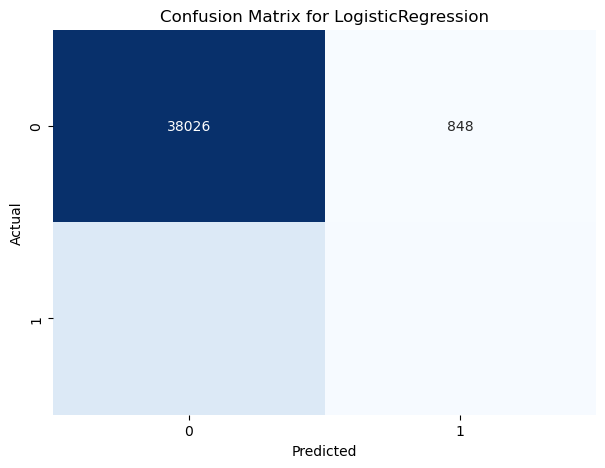

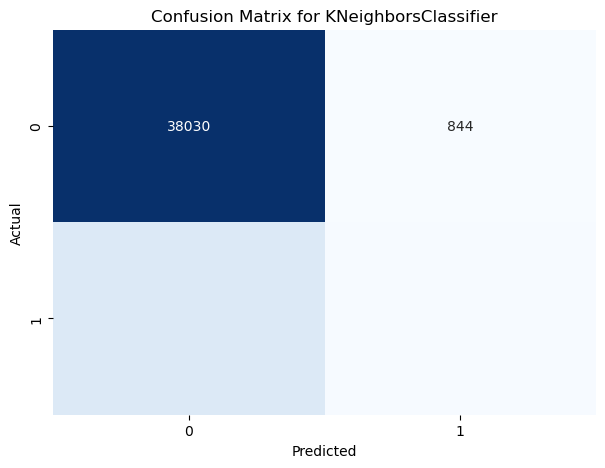

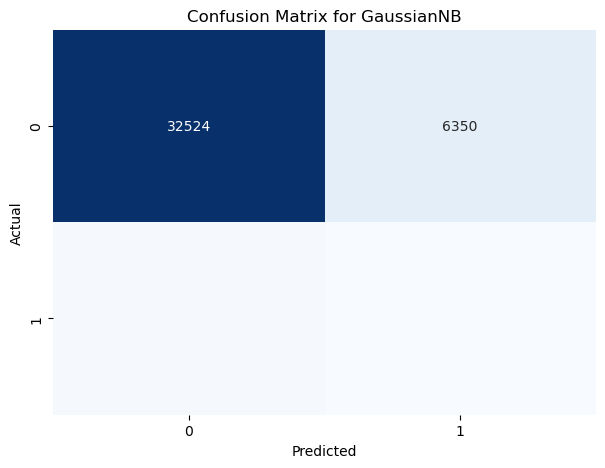

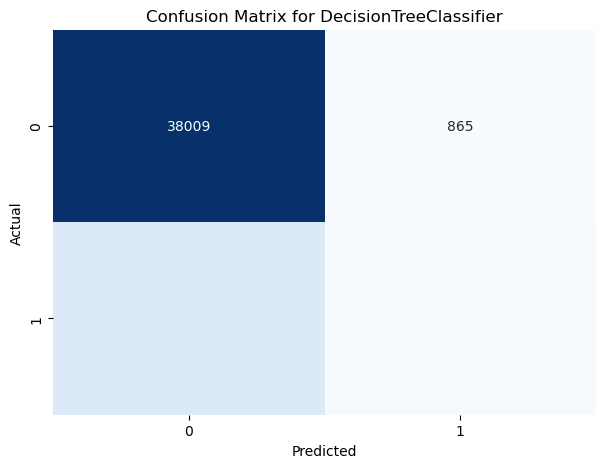

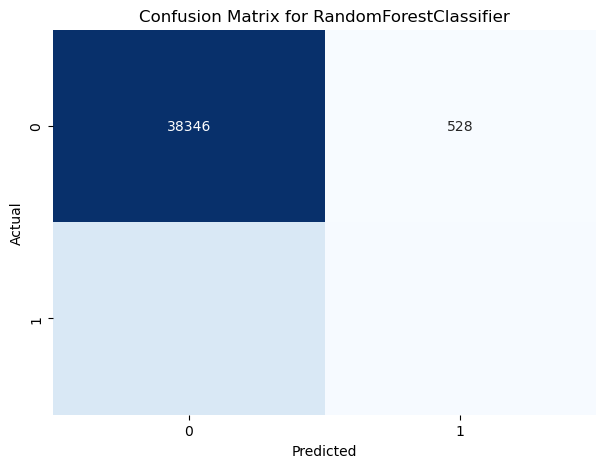

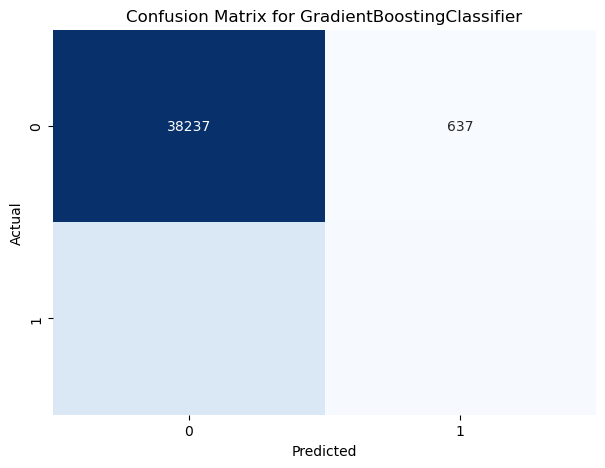

C:\Users\sbana\anaconda3\envs\tensorflow_gpu\lib\site-packages\xgboost\data.py:427: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):


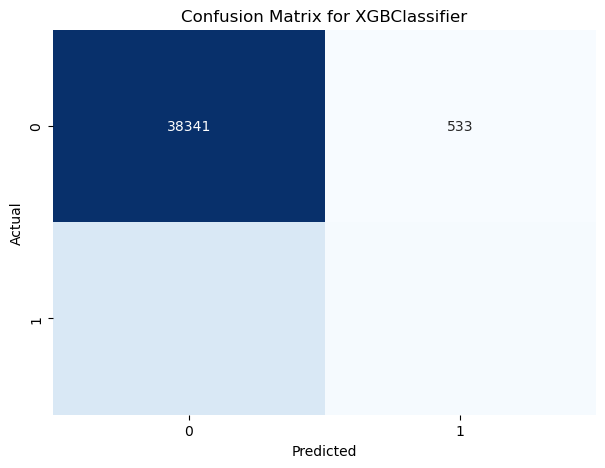

In [35]:
for key in result:
    best_params = result[key][-1]  # Retrieve best parameters
    classifier = model_params[key][0].set_params(**best_params)  # Set best parameters
    classifier.fit(x_train, y_train)
    y_pred = classifier.predict(x_test)
    plot_confusion_matrix(y_test, y_pred, title=f'Confusion Matrix for {key}')

LOGISTIC REGRESSION DOESNOT CONVERGE IF THE FEATURES ARE NOT SCALED

Recall is very important in medical domains (e.g., identifying cancer), where you really want to minimize the chance of missing positive cases (predicting false negatives). These are typically cases where missing a positive case has a much bigger cost than wrongly classifying something as positive.


#TAKING CARE OF THE IMBALANCED DATASET

UNDERSAMPLING


In [36]:
nm=NearMiss()  #no improvement using near miss

In [38]:
X_rus,Y_rus=nm.fit_resample(X,Y)

In [39]:
x_train,x_test,y_train,y_test=train_test_split(X_rus,Y_rus,test_size=0.20,random_state=0) #80% for training and 20% for testing

In [40]:
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)


In [41]:
result_under={}

for key, value in model_params.items():
    result_list=[]
    classifier = GridSearchCV(value[0],value[1],cv=10, scoring="accuracy", n_jobs=-1).fit(x_train, y_train)
    y_pred = classifier.predict(x_test)
    y_pred_prob=classifier.predict_proba(x_test)[:,1]
    score= accuracy_score(y_test,y_pred)
    score1 = f1_score(y_test, y_pred)
    score2 = roc_auc_score(y_test, y_pred_prob)
    score3 = precision_score(y_test, y_pred)
    score4 = recall_score(y_test, y_pred)
    best_params = classifier.best_params_
    
    result_list.append(score)
    result_list.append(score1)
    result_list.append(score2)
    result_list.append(score3)
    result_list.append(score4)
    result_list.append(best_params) 
    result_under[key]=result_list

C:\Users\sbana\anaconda3\envs\tensorflow_gpu\lib\site-packages\xgboost\data.py:427: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):


In [42]:
final_results= pd.DataFrame(result_under)
final_results=final_results.T
columns=final_results.columns.tolist()
columns[0]="Accuracy"
columns[1]="F1 score"
columns[2]="roc auc score"
columns[3]="Presicion"
columns[4]="recall"
columns[5]="best parameters"
final_results.columns=columns
final_results

,Accuracy,F1 score,roc auc score,Presicion,recall,best parameters
LogisticRegression,0.804616,0.791232,0.883025,0.868795,0.726383,{}
KNeighborsClassifier,0.807322,0.790033,0.879334,0.888598,0.711151,{'n_neighbors': 19}
GaussianNB,0.76779,0.730132,0.882433,0.895613,0.616266,{}
DecisionTreeClassifier,0.832965,0.823909,0.90133,0.89044,0.766629,"{'criterion': 'entropy', 'max_depth': 10, 'min..."
RandomForestClassifier,0.836384,0.828467,0.909627,0.889655,0.775154,"{'criterion': 'gini', 'max_depth': 10, 'n_esti..."
GradientBoostingClassifier,0.835387,0.827627,0.906676,0.887538,0.775293,"{'learning_rate': 0.05, 'n_estimators': 100}"
XGBClassifier,0.83496,0.826221,0.906964,0.891695,0.769704,"{'learning_rate': 0.05, 'max_depth': 3}"


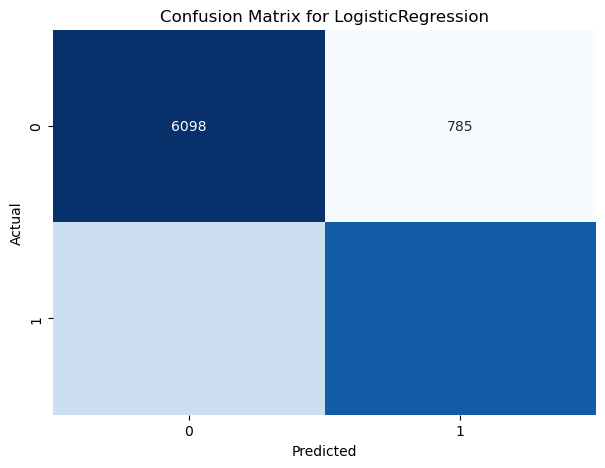

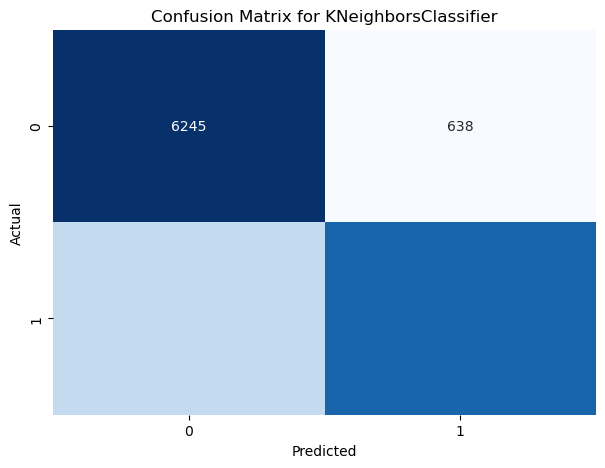

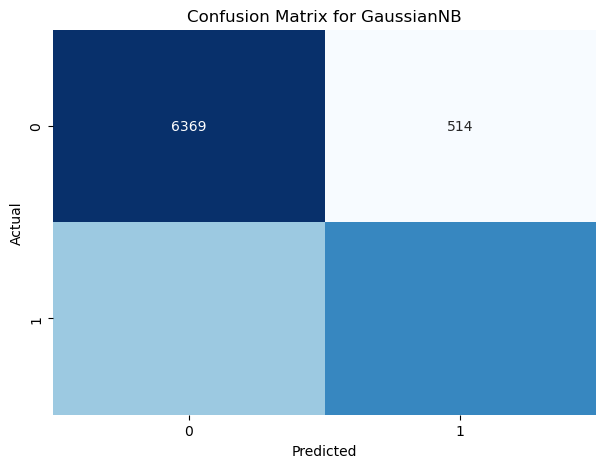

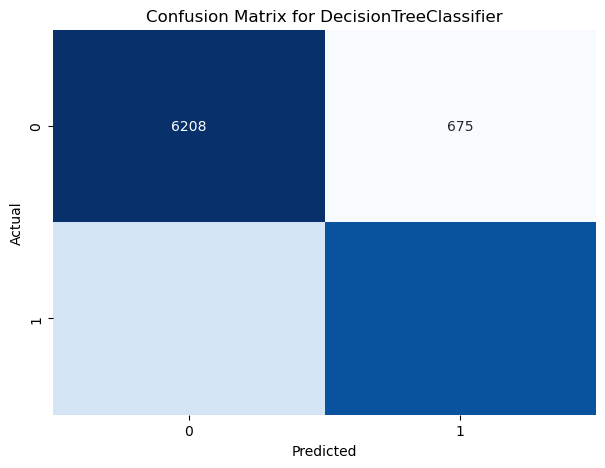

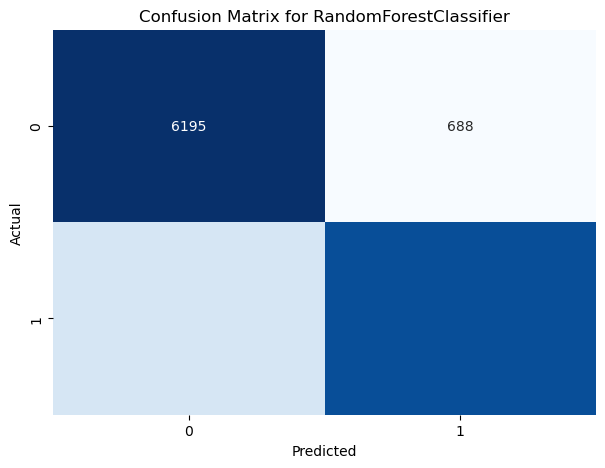

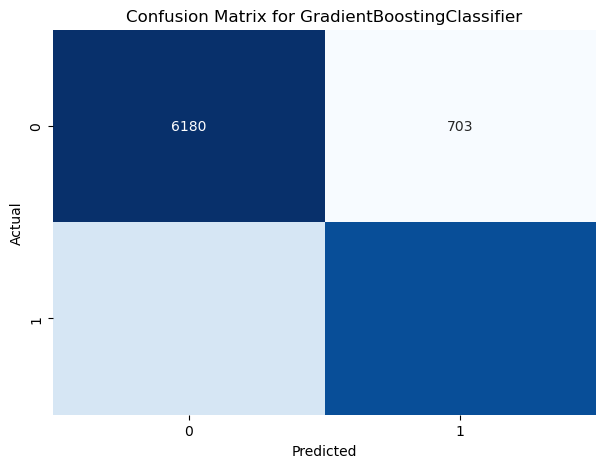

C:\Users\sbana\anaconda3\envs\tensorflow_gpu\lib\site-packages\xgboost\data.py:427: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):


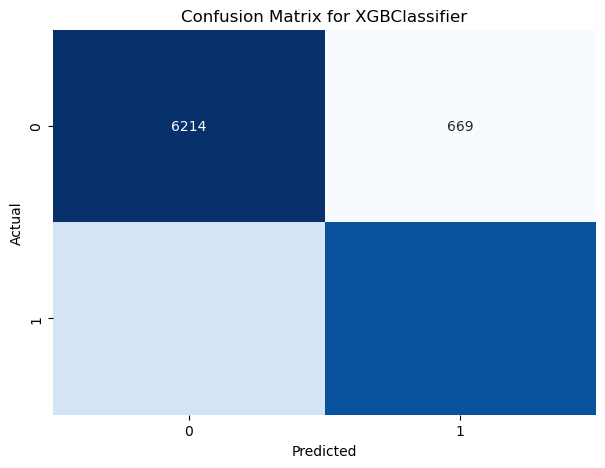

In [43]:
for key in result_under:
    best_params = result_under[key][-1]  # Retrieve best parameters
    classifier = model_params[key][0].set_params(**best_params)  # Set best parameters
    classifier.fit(x_train, y_train)
    y_pred = classifier.predict(x_test)
    plot_confusion_matrix(y_test, y_pred, title=f'Confusion Matrix for {key}')
    

upsampling with SMOTE

For every observation in the minority class, SMOTE selects
k nearest neighbors, takes the difference between the feature vector of the observation under consideration and its nearest neighbor, multiplies this difference by a random number between 0 and 1, and adds it to the feature vector of the observation.

In [44]:
oversample = SMOTE(random_state=508312)

In [46]:
X_o,Y_o=oversample.fit_resample(X,Y)

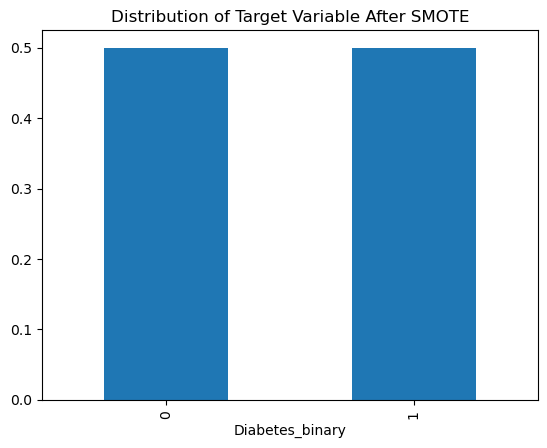

In [47]:
Y_over=pd.Series(Y_o)
Y_over.value_counts(normalize=True).plot(kind='bar')
plt.title('Distribution of Target Variable After SMOTE')
plt.show()

In [48]:
x_train,x_test,y_train,y_test=train_test_split(X_o,Y_o,test_size=0.20,random_state=0) #80% for training and 20% for testing

In [49]:
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)


In [50]:
result_smote={}

for key, value in model_params.items():
    result_list=[]
    classifier = GridSearchCV(value[0],value[1],cv=10, scoring="accuracy", n_jobs=-1).fit(x_train, y_train)
    y_pred = classifier.predict(x_test)
    y_pred_prob=classifier.predict_proba(x_test)[:,1]
    score= accuracy_score(y_test,y_pred)
    score1 = f1_score(y_test, y_pred)
    score2 = roc_auc_score(y_test, y_pred_prob)
    score3 = precision_score(y_test, y_pred)
    score4 = recall_score(y_test, y_pred)
    best_params = classifier.best_params_
    
    result_list.append(score)
    result_list.append(score1)
    result_list.append(score2)
    result_list.append(score3)
    result_list.append(score4)
    result_list.append(best_params) 
    result_smote[key]=result_list

C:\Users\sbana\anaconda3\envs\tensorflow_gpu\lib\site-packages\xgboost\data.py:427: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):


In [51]:
final_results= pd.DataFrame(result_smote)
final_results=final_results.T
columns=final_results.columns.tolist()
columns[0]="Accuracy"
columns[1]="F1 score"
columns[2]="roc auc score"
columns[3]="Presicion"
columns[4]="recall"
columns[5]="best parameters"
final_results.columns=columns
final_results

,Accuracy,F1 score,roc auc score,Presicion,recall,best parameters
LogisticRegression,0.708454,0.713426,0.778442,0.699524,0.727892,{}
KNeighborsClassifier,0.78107,0.78994,0.781198,0.75718,0.825663,{'n_neighbors': 1}
GaussianNB,0.668866,0.645294,0.745633,0.69246,0.604143,{}
DecisionTreeClassifier,0.795784,0.803251,0.827132,0.772855,0.836137,"{'criterion': 'entropy', 'max_depth': 30, 'min..."
RandomForestClassifier,0.818652,0.827519,0.904373,0.786897,0.872562,"{'criterion': 'entropy', 'max_depth': 30, 'n_e..."
GradientBoostingClassifier,0.718447,0.730682,0.791289,0.698417,0.766072,"{'learning_rate': 0.05, 'n_estimators': 100}"
XGBClassifier,0.717277,0.729685,0.790807,0.697175,0.765375,"{'learning_rate': 0.05, 'max_depth': 3}"


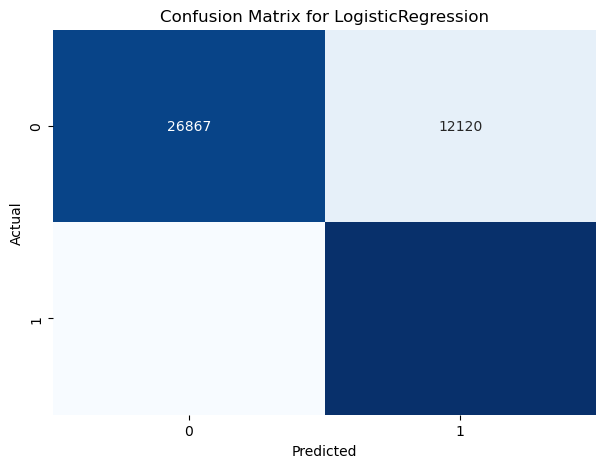

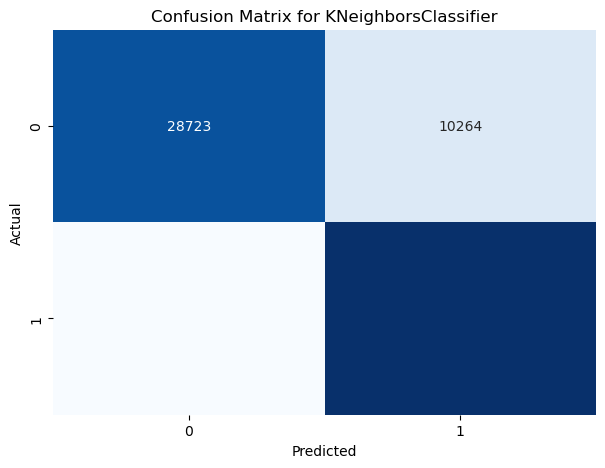

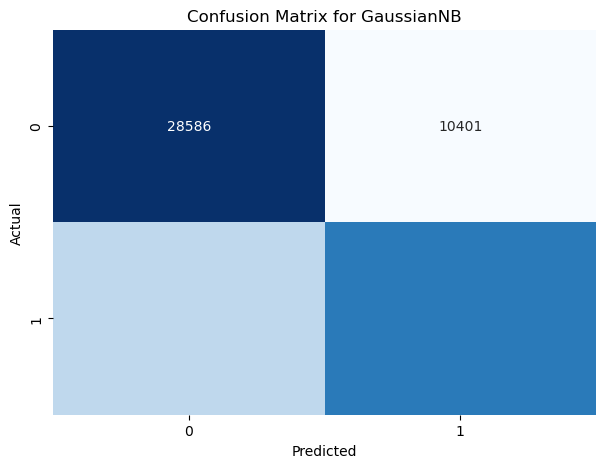

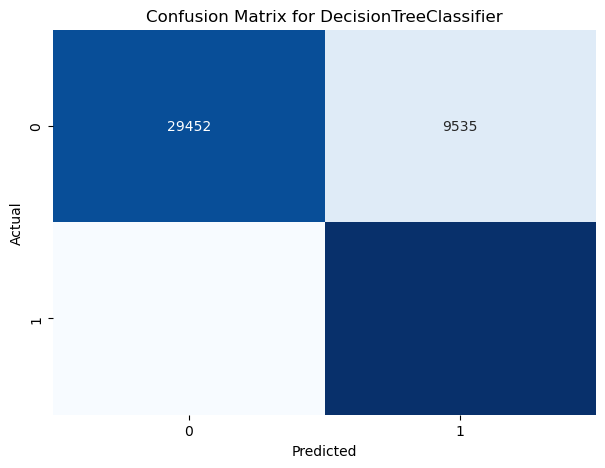

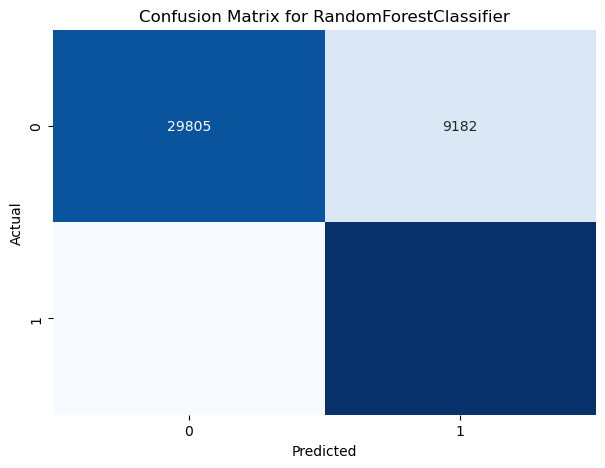

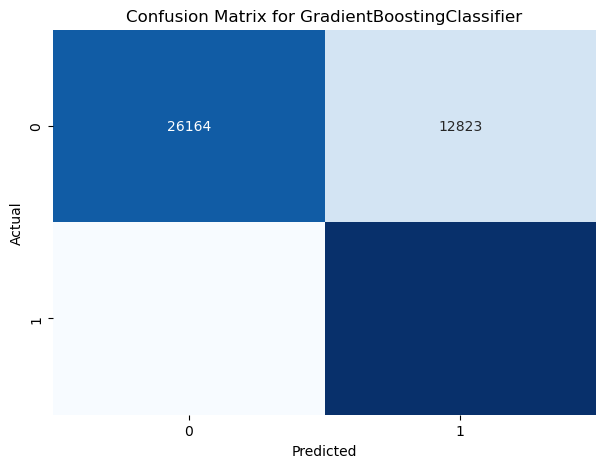

C:\Users\sbana\anaconda3\envs\tensorflow_gpu\lib\site-packages\xgboost\data.py:427: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):


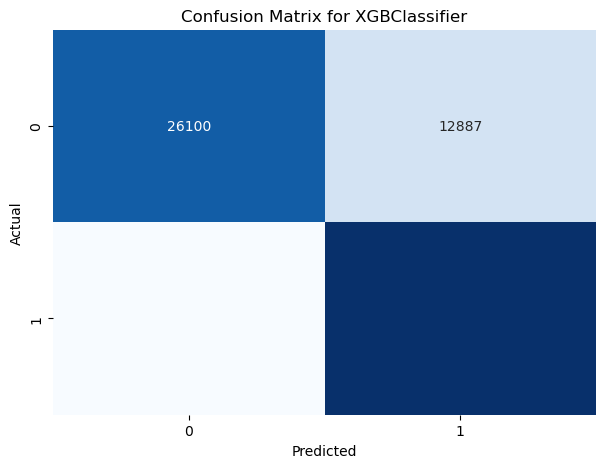

In [52]:
for key in result_smote:
    best_params = result_smote[key][-1]  # Retrieve best parameters
    classifier = model_params[key][0].set_params(**best_params)  # Set best parameters
    classifier.fit(x_train, y_train)
    y_pred = classifier.predict(x_test)
    plot_confusion_matrix(y_test, y_pred, title=f'Confusion Matrix for {key}')
    